In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

In [17]:
def load_data():
    df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
    df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)
    y_train = df_train.iloc[:, 0].values
    X_train = df_train.iloc[:, 1:].values/255
    y_test = df_test.iloc[:, 0].values
    X_test = df_test.iloc[:, 1:].values/255
    return X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = load_data()

In [18]:
X_train.shape

(60000, 784)

In [6]:
28 * 28

784

In [11]:
X_train = df_train.iloc[:, 1:].values

In [15]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

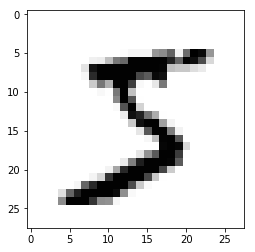

In [14]:
plt.imshow(X_train[0].reshape(28, 28), cmap="Greys")

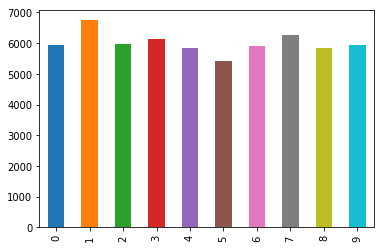

In [21]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

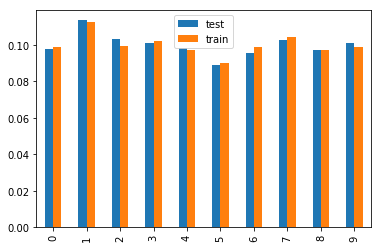

In [25]:
pd.DataFrame({"train": (pd.Series(y_train).value_counts().sort_index())/len(y_train), 
              "test": (pd.Series(y_test).value_counts().sort_index())/len(y_test)}).plot.bar()

In [30]:
%%time 

est = linear_model.SGDClassifier(alpha=0.001
                                 , max_iter= 1000
                                 , tol=1e-4
                                 , eta0=0.1
                                 , learning_rate="invscaling"
                                 , n_jobs=2
                                 , random_state=1)

est.fit(X_train, y_train)
print("test accuracy:", est.score(X_test, y_test))


test accuracy: 0.9151
CPU times: user 14 s, sys: 220 ms, total: 14.2 s
Wall time: 7.94 s


In [37]:
y_test_pred = est.predict(X_test)

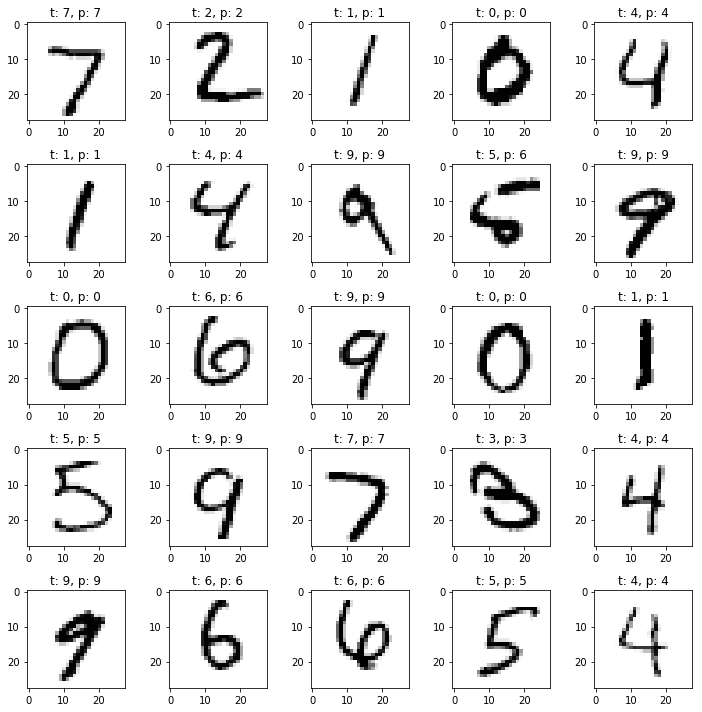

In [38]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap = "Greys")
    ax.set_title("t: %d, p: %d" % (y_test[i], y_test_pred[i]))

plt.tight_layout()

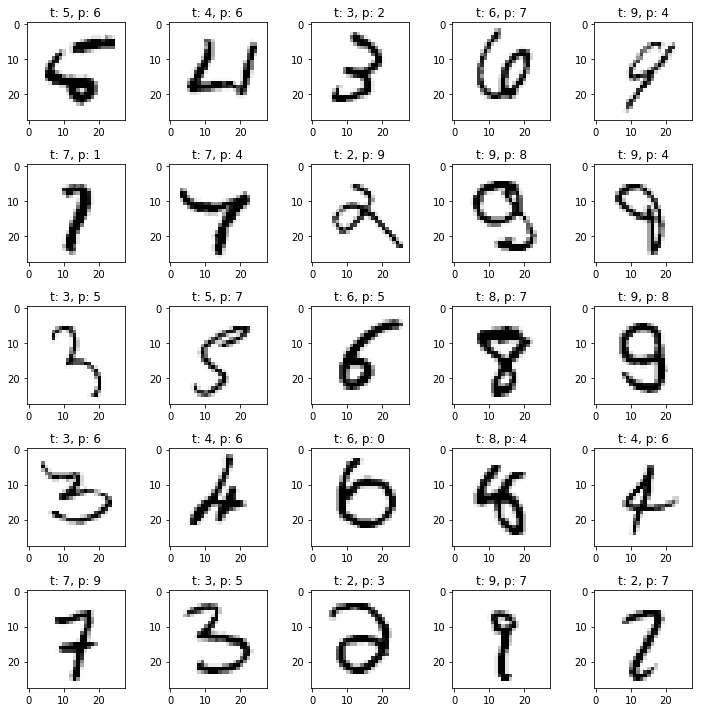

In [39]:
wrong = y_test != y_test_pred
fig, _ = plt.subplots(5, 5, figsize = (10, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[wrong][i].reshape(28, 28), cmap = "Greys")
    ax.set_title("t: %d, p: %d" % (y_test[wrong][i], y_test_pred[wrong][i]))

plt.tight_layout()

In [41]:
est.coef_.shape

(10, 784)

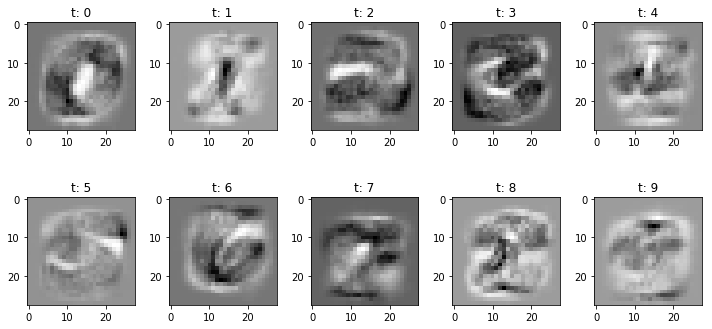

In [44]:
fig, _ = plt.subplots(2, 5, figsize = (10, 5))

for i, ax in enumerate(fig.axes):
    ax.imshow(est.coef_[i].reshape((28, 28)), cmap = "Greys")
    ax.set_title("t: %d" % (i))

plt.tight_layout()

In [46]:
pd.DataFrame(est.coef_[0].reshape((28, 28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000204,0.000118,-0.000474,-0.006077,-0.006801,-0.009373,-0.018575,...,-0.055422,-0.042021,-0.029699,-0.013136,-0.011106,-0.011498,-0.002974,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,-0.000140,-0.002441,-0.006872,-0.014491,-0.020760,-0.027582,-0.050839,...,-0.126204,-0.102959,-0.088009,-0.071486,-0.047704,-0.020839,-0.005749,-0.002595,-0.000546,0.000000
4,0.000000,0.000000,0.000000,-0.000455,-0.002904,-0.015263,-0.031736,-0.048343,-0.056880,-0.065140,...,-0.052395,-0.053730,-0.073206,-0.092035,-0.084925,-0.045768,-0.031956,-0.013556,-0.002194,0.000000
5,0.000000,0.000000,-0.000276,-0.001769,-0.009678,-0.030184,-0.052986,-0.072143,-0.069212,-0.067721,...,0.072552,0.018262,-0.029508,-0.033377,-0.040564,-0.067413,-0.072412,-0.032620,-0.007549,-0.000869
6,0.000000,0.000000,-0.000556,-0.000584,-0.012576,-0.029742,-0.045457,-0.048471,-0.073649,-0.092383,...,0.089999,0.075717,0.016223,0.038648,0.004177,-0.081174,-0.125307,-0.067561,-0.019646,-0.004281
7,0.000000,0.000000,-0.001440,-0.003500,-0.021573,-0.033050,-0.046081,-0.075927,-0.082185,-0.024639,...,0.100338,0.084071,0.053149,0.007434,-0.000551,-0.082503,-0.147385,-0.085157,-0.023102,-0.002321
8,0.000665,0.000000,-0.001455,-0.007373,-0.035226,-0.052988,-0.047556,-0.068769,-0.036860,-0.027209,...,0.083727,0.033790,0.025522,-0.000768,0.017636,-0.016585,-0.120139,-0.093233,-0.023514,-0.003361
9,0.000000,0.000000,-0.002300,-0.011304,-0.037884,-0.053433,-0.041932,-0.043312,-0.045624,-0.031985,...,0.109645,0.063900,0.013321,0.002100,0.016664,0.034655,-0.076062,-0.081092,-0.028455,-0.001231
